# Python-MLearning: Loan Data using Logistic Regression (LR) and Sklearn
## EXPLORING DATASET AND FEATURE ENGINEERING

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I IMPORT REQUIRED PACKAGES

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# II LOADING DATA

In [2]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic3_Loan'

In [3]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'Link to  Logistic stuff here.txt',
 'Links to LR3 GITHUBE and Nbviewer.txt',
 'LoanFree_LRModel.csv',
 'LoanFull.csv',
 'Loan_FullProcess.csv',
 'Loan_LRModel.csv',
 'Loan_Prediction',
 'Log_ROC.png',
 'Material Support',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL-RFECV_Final.ipynb',
 'PYTHON-MLearning_LR3_Classical.ipynb',
 'PYTHON-MLearning_LR3_Exploratory_FEngineering_Final.ipynb',
 'PYTHON-MLearning_LR3_PCA.ipynb',
 'Summaries.xlsx',
 'To Put in the GitHube Menu.txt',
 'Visual']

In [4]:
# read csv (comma separated value) into data
df=pd.read_csv('LoanFull.csv')
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# III DATA CHECKING  AND EXPLORATORY

## HOW ABOUT DATA CHECKING?

In [56]:
df.head()

# print head and tail rows from dataset 
print("* data.head()", df.head(), sep="\n", end="\n\n")
print("* data.tail()", df.tail(), sep="\n", end="\n\n")

* data.head()
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2     

The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents.

Each row following the first one represents an entry for a client.

In [8]:
# shape
print(df.shape)

(981, 14)


This is exactly the result we are looking for. We should see 981 registers (rows) and 14 fields (columns) as an answer.

In [57]:
# get some information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB
None


There are fields (variables) that have missing values. This situation will be discussed in the corresponding section.

In [58]:
# important statistics
round(df.describe(),2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.0,981.00,954.00,961.0,902.00
mean,5179.8,1601.92,142.51,342.2,0.84
std,5695.1,2718.77,77.42,65.1,0.37
min,0.0,0.00,9.00,6.0,0.00
25%,2875.0,0.00,100.00,360.0,1.00
50%,3800.0,1110.00,126.00,360.0,1.00
75%,5516.0,2365.00,162.00,360.0,1.00
max,81000.0,41667.00,700.00,480.0,1.00


Here we can highlit that 84% of applicants have a credit_history, some important data situations:

* ApplicantIncome and CoapplicantIncome presents high standard deviations.
* 84% applicants have a credit_history.
* Most of the variables are skew (mean different from median).


In [59]:
# check missing values in dataset
df.isnull().sum()


Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

More than 50% of the variables have missing values. So we will go over them to see how we can fill those missing values in a reasonable way.

In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
#  tell pandas to look for rows with missing values
df[(df['Gender'].isnull()) |
              (df['Married'].isnull()) |
              (df['Dependents'].isnull()) |
              (df['Self_Employed'].isnull()) |
              (df['LoanAmount'].isnull()) |
              (df['Loan_Amount_Term'].isnull()) |
              (df['Credit_History'].isnull())].head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


## HOW ABOUT SOME DATA EXPLORATION?

### ABOUT OUTPUT VARIABLE LOAN_STATUS

### General

In [9]:
df['Loan_Status'].value_counts()

Y    730
N    251
Name: Loan_Status, dtype: int64

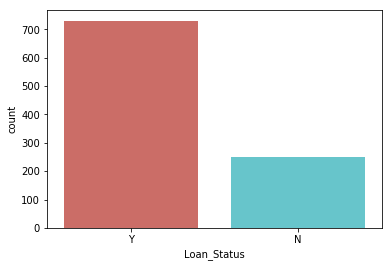

In [7]:
sns.countplot(x='Loan_Status',data=df, palette='hls')

There are 251 no's (N) and 730 yes's (Y)in the outcome variables. So, we are dealing with an unbalanced dataset.

### Average by groupping variables


In [66]:
#Loan_Status and the rest:

#var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = df.pivot_table(index=['Loan_Status'], values=df.columns, aggfunc=('mean'))
round(compara,2)

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,
N,5045.47,1877.97,0.41,148.01,345.42
Y,5225.98,1507.00,0.99,140.67,341.11


In [68]:
#Gender, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status','Gender'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Gender                                                       
N           Female          3965.34            1784.88            0.41   
            Male            5401.97            1904.02            0.41   
Y           Female          4645.86             885.53            0.99   
            Male            5208.49            1653.67            0.99   

                    LoanAmount  Loan_Amount_Term  
Loan_Status Gender                                
N           Female      131.83            358.29  
            Male        152.95            342.48  
Y           Female      124.85            349.29  
            Male        142.99            339.10

In [69]:
#Married, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status','Married'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Married                                                       
N           No               4702.50            1882.36            0.46   
            Yes              5284.15            1874.92            0.37   
Y           No               4810.91            1161.73            0.99   
            Yes              5429.57            1689.22            0.99   

                     LoanAmount  Loan_Amount_Term  
Loan_Status Married                                
N           No           137.88            348.30  
            Yes          155.18            343.38  
Y           No           121.14            345.70  
            Yes          150.57            338.66

In [70]:
#Dependents, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status', 'Dependents'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Dependents                                                       
N           0                   4694.62            1752.49            0.44   
            1                   5883.95            1785.24            0.47   
            2                   4157.69            1499.14            0.33   
            3+                  6944.81            3355.26            0.28   
Y           0                   4710.23            1574.77            0.99   
            1                   5409.58            1478.15            0.99   
            2                   5124.75            1777.70            0.99   
            3+                  8253.48             755.77            0.97   

                        LoanAmount  Loan_Amount_Term  
Loan_Status Dependents                                
N           0               141.05            349.28  
            1               156.00            327.00  
            2               145.24            358.33  
            3+              178.92            327.69  
Y           0               131.46            346.18  
            1               146.99            338.36  
            2               153.45            335.81  
            3+              167.73            327.62

In [71]:
#Education, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status', 'Education'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Education                                                          
N           Graduate              5541.95            2127.56            0.42   
            Not Graduate          3709.35            1206.28            0.37   
Y           Graduate              5621.53            1551.44            0.99   
            Not Graduate          3696.54            1335.16            0.99   

                          LoanAmount  Loan_Amount_Term  
Loan_Status Education                                   
N           Graduate          155.67            348.97  
            Not Graduate      126.62            335.63  
Y           Graduate          147.32            341.19  
            Not Graduate      114.98            340.80

In [72]:
#Self_Employed, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status', 'Self_Employed'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Self_Employed                                                       
N           No                     4934.16            1785.30            0.41   
            Yes                    6142.68            1680.64            0.48   
Y           No                     4877.68            1513.96            0.99   
            Yes                    7149.47            1397.31            1.00   

                           LoanAmount  Loan_Amount_Term  
Loan_Status Self_Employed                                
N           No                 146.30            346.88  
            Yes                159.07            332.14  
Y           No                 136.13            342.33  
            Yes                166.85            338.16

In [73]:
#Property_Area, Loan_Status and the rest:
compara = df.pivot_table(index=['Loan_Status', 'Property_Area'], values=df.columns, aggfunc='mean')
round(compara,2)

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Property_Area                                                       
N           Rural                  5782.00            1839.36            0.46   
            Semiurban              4945.40            1428.95            0.33   
            Urban                  4378.26            2304.56            0.42   
Y           Rural                  4911.89            1714.19            0.99   
            Semiurban              5155.81            1524.47            0.98   
            Urban                  5548.96            1324.91            1.00   

                           LoanAmount  Loan_Amount_Term  
Loan_Status Property_Area                                
N           Rural              155.92            349.81  
            Semiurban          149.36            339.16  
            Urban              138.29            346.43  
Y           Rural              142.80            341.77  
            Semiurban          139.60            346.72  
            Urban              140.14            334.45

Some important things can be observed from the tables above like:

* Guys with Loan_Status "Y" have high Credit_History % .
* Men have high ApplicantIncome than Women.
* Married people have high ApplicantIncome than Not Married ones.
* Graduate people have high ApplicantIncome and LoanAmout than Not Graduate.
*Self_Employed people have high ApplicantIncome and LoanAmout than Not Self_Employed.	

### Its categorical predictors dependence

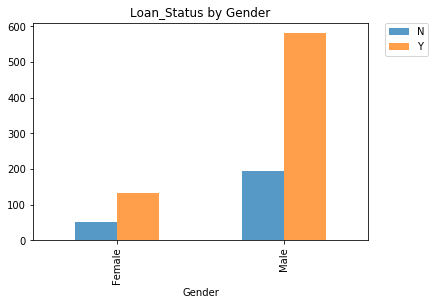

In [95]:
import matplotlib.pyplot as plt
pd.crosstab(df.Gender,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Gender')
plt.xlabel('Gender')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [70]:
pd.crosstab(df.Gender,df.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,50,132
Male,194,581


In [71]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Gender,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 0.34251  p_value full is:  0.5583857404419671  p_value rounded : 0.55839


The Loan_Status NOT depends on the Gender. Thus, the "Gender" may NOT be a good predictor of the outcome variable (Y).

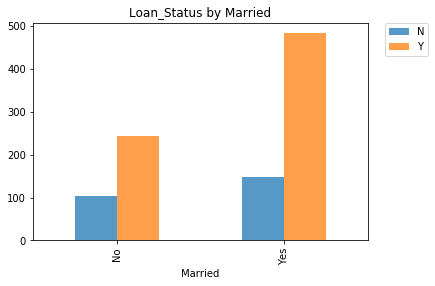

In [76]:
import matplotlib.pyplot as plt
pd.crosstab(df.Married,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Married')
plt.xlabel('Married')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [77]:
pd.crosstab(df.Married,df.Loan_Status)

Loan_Status,N,Y
Married,,
No,103,244
Yes,148,483


In [73]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Married,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 4.23147  p_value full is:  0.03968105594662411  p_value rounded : 0.03968


The Loan_Status depends on the Married. Thus, the "Married" may be a good predictor of the outcome variable (Y).

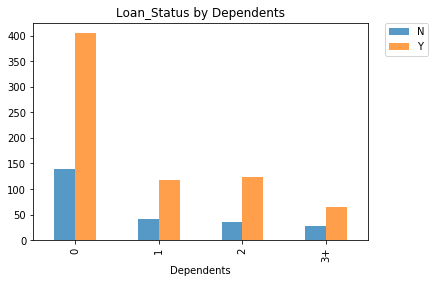

In [74]:
import matplotlib.pyplot as plt
pd.crosstab(df.Dependents,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [78]:
pd.crosstab(df.Dependents,df.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,140,405
1,42,118
2,36,124
3+,27,64


In [75]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Dependents,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)

Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 1.63503  p_value full is:  0.6514729976570259  p_value rounded : 0.65147


The Loan_Status NOT depends on the Dependents. Thus, the "Dependents" may NOT be a good predictor of the outcome variable (Y).

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(df.Education,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Education')
plt.xlabel('Dependents')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
pd.crosstab(df.Education,df.Loan_Status)

Loan_Status,N,Y
Education,,
Graduate,183,580
Not Graduate,68,150


In [79]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Education,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)

Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 4.25647  p_value full is:  0.039101153730083646  p_value rounded : 0.03910


The Loan_Status depends on the Education. Thus, the "Education" may be a good predictor of the outcome variable (Y).

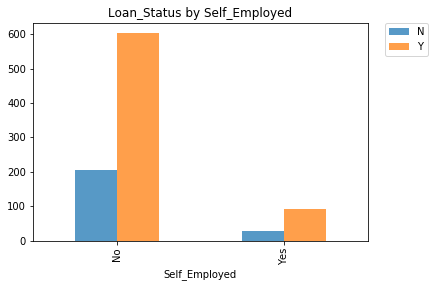

In [80]:
import matplotlib.pyplot as plt
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [81]:
pd.crosstab(df.Self_Employed,df.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,205,602
Yes,28,91


In [82]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Self_Employed,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)

Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 0.10659  p_value full is:  0.7440609094762638  p_value rounded : 0.74406


The Loan_Status NOT depends on the Self_Employed. Thus, the "Self_Employed" may NOT be a good predictor of the outcome variable (Y).

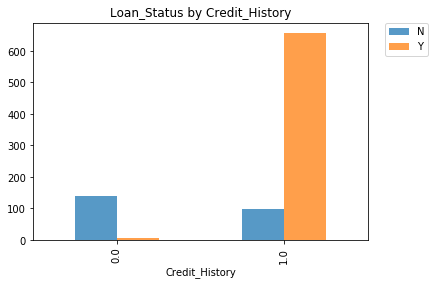

In [98]:
import matplotlib.pyplot as plt
pd.crosstab(df.Credit_History,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [85]:
pd.crosstab(df.Credit_History,df.Loan_Status)

Loan_Status,N,Y
Credit_History,,
0.0,141,7
1.0,97,657


In [86]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Credit_History,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)

Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 428.28915  p_value full is:  3.830500937183836e-95  p_value rounded : 0.00000


The Loan_Status depends on the Credit_History. Thus, the "Credit_History" may be a good predictor of the outcome variable (Y).

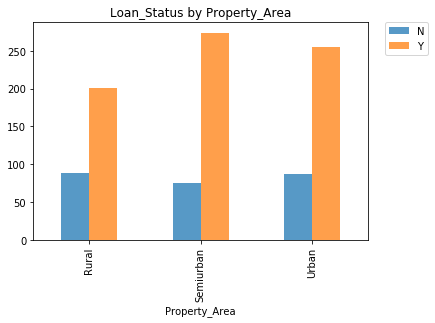

In [100]:
import matplotlib.pyplot as plt
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar',  alpha=0.75,)
plt.title('Loan_Status by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [101]:
pd.crosstab(df.Property_Area,df.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,89,201
Semiurban,75,274
Urban,87,255


In [102]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.Property_Area,df.Loan_Status))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)

Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 7.04660  p_value full is:  0.029501844716874247  p_value rounded : 0.02950


The Loan_Status depends on the Property_Area. Thus, the "Property_Area" may be a good predictor of the outcome variable (Y).

The following table presents a summary of the results of the Chi-Squared Test of Independence run between Loan_Status and the categorical variables.

![My Title](Visual/Summary/Summary1.png)

So, taking into account a 5% of risk we should expect that variables "Gender", "Dependents", and "Self_Employed" may NOT be good predictors for "Loan_Status" under a Logistic Regression model.


### ABOUT  VARIABLES DISTRIBUTION

The following visualizations are made following some ideas similar to the ones exposed [here](https://matplotlib.org/gallery/statistics/histogram_multihist.html). The adaptation of the data and the manipulation of attributes in the graphics are done using the Panda and Matplotlib libraries, respectively.

### General Distribution

#### ApplicantIncome

![My Title](Visual/ApplicantIncome/ApplicantIncome_with_Rest.png)

A marked asymmetry towards low values of ApplicantIncome as well as the presence of very marked outliers towards high values is observed through all the distribution graphs of the variable. In the same mode, the shape of the curve is very similar throughout all the graphs.

#### CoapplicantIncome

![My Title](Visual/CoapplicantIncome/CoapplicantIncome_with_Rest.png)

A marked asymmetry towards low values of CoapplicantIncome as well as the presence of very marked outliers towards high values is observed through all the distribution graphs of the variable. In the same mode, the shape of the curve is very similar throughout all the graphs.

#### Loan_Amount

![My Title](Visual/LoanAmount/LoanAmount_with_Rest.png)

A marked asymmetry towards low values of Loan_Amount as well as the presence of very marked outliers towards high values is observed through all the distribution graphs of the variable. In the same mode, the shape of the curve is very similar throughout all the graphs.

#### Loan_Amount_Term

![My Title](Visual/Loan_Amount_Term/Loan_Amount_Term_with_Rest.png)

The Loan_Amount_Term tend to be grouped mostly around 400. However, there is also a non-negligible group that is around 200.

### Average by groupping variables

In [27]:
#Gender and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df1 = df.pivot_table(index=['Gender'], values=var_list, aggfunc=('mean','std'))
round(df1,2)


ApplicantIncome          CoapplicantIncome          LoanAmount         \
                  mean      std              mean      std       mean    std   
Gender                                                                         
Female         4458.91  3256.53           1132.60  3431.76     126.74  72.62   
Male           5256.93  5838.82           1716.34  2542.84     145.43  75.84   

       Loan_Amount_Term         
                   mean    std  
Gender                          
Female           351.75  56.55  
Male             339.94  67.20

In [28]:
#Married and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df2 = df.pivot_table(index=['Married'], values=var_list, aggfunc=('mean','std'))
round(df2,2)

ApplicantIncome          CoapplicantIncome          LoanAmount         \
                   mean      std              mean      std       mean    std   
Married                                                                         
No              4778.73  3925.41           1375.63  3711.78     126.01  64.53   
Yes             5395.46  6466.42           1732.78  1969.01     151.62  82.48   

        Loan_Amount_Term         
                    mean    std  
Married                          
No                346.47  62.35  
Yes               339.76  66.29

In [29]:
#Dependents and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df3 = df.pivot_table(index=['Dependents'], values=var_list, aggfunc=('mean','std'))
round(df3,2)

ApplicantIncome           CoapplicantIncome          LoanAmount  \
                      mean       std              mean      std       mean   
Dependents                                                                   
0                  4706.22   4515.74           1620.42  2620.19     133.86   
1                  5534.10   5114.16           1558.76  1711.65     149.39   
2                  4907.16   2926.05           1715.02  2592.15     151.67   
3+                 7865.20  12513.00           1527.04  4621.43     170.88   

                   Loan_Amount_Term         
               std             mean    std  
Dependents                                  
0            68.60           346.98  59.03  
1            85.76           335.46  70.83  
2            71.16           340.88  67.58  
3+          113.42           327.64  77.31

In [30]:
#Education and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df4 = df.pivot_table(index=['Education'], values=var_list, aggfunc=('mean','std'))
round(df4,2)


ApplicantIncome          CoapplicantIncome          LoanAmount  \
                        mean      std              mean      std       mean   
Education                                                                     
Graduate             5602.44  6295.00           1689.62  2967.00     149.30   
Not Graduate         3700.54  2121.23           1294.96  1532.31     118.47   

                    Loan_Amount_Term         
                std             mean    std  
Education                                    
Graduate      84.05           343.04  63.44  
Not Graduate  38.41           339.20  70.81

In [31]:
#Self_Employed and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df5 = df.pivot_table(index=['Self_Employed'], values=var_list, aggfunc=('mean','std'))
round(df5,2)

ApplicantIncome          CoapplicantIncome          LoanAmount  \
                         mean      std              mean      std       mean   
Self_Employed                                                                  
No                    4892.03  5406.79           1582.89  2439.67     138.66   
Yes                   6912.58  5727.30           1463.97  2462.24     165.04   

                      Loan_Amount_Term         
                  std             mean    std  
Self_Employed                                  
No              72.24           343.47  64.12  
Yes            101.75           336.72  70.95

In [32]:
#Property_Area and the rest:
var_list = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount', 'Loan_Amount_Term']
df6 = df.pivot_table(index=['Property_Area'], values=var_list, aggfunc=('mean','std'))
round(df6,2)

ApplicantIncome          CoapplicantIncome          LoanAmount  \
                         mean      std              mean      std       mean   
Property_Area                                                                  
Rural                 5178.92  5631.77           1752.61  2460.84     146.79   
Semiurban             5110.59  5056.62           1503.94  2126.11     141.68   
Urban                 5251.15  6342.57           1574.12  3386.41     139.69   

                     Loan_Amount_Term         
                 std             mean    std  
Property_Area                                 
Rural          72.13           344.20  58.00  
Semiurban      75.73           345.10  62.83  
Urban          83.40           337.48  72.66

The following table present a summary of the averages by groupping variables.

#averages by groupping variables
![My Title](Visual/Summary/Summary2.png)

* The highest averages are 7865.20 (category 3+ dependents) and 6912.58 (category Yes Self_Employed).
* The highest LoanAmount averages are 170.88 (category 3+ dependents) and 165.04 (category Yes Self_Employed).
* Through all the variables and categories, the most heterogeneous distributions (the highest cv ) are "category 3+, * Dependents" and "category Urban, Property_Area" while both are present in the variable ApplicantIncome.
* ApplicantIncome presents the most heterogeneous distribution (cv = 1.10) among all the variables.
* Loan_Ammount_Term has the most homogeneous distribution (cv = 0.19) among all the variables.


# IV DATA MUNGING AND FEATURES ENGINE

## DATA MUNGING

### ABOUT MISSING VALUES ASSESSMENT

One of the first things we should look for is missing data. We already know that our dataset has missing values.  The distribution of them by each feature in the dataset is:

In [74]:
# check missing values in dataset
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

More than 50% of the variables have missing values. For the categorical variables, the missing data will be replaced by the respective "mode". For the other two variables, we will go over them to see how we can fill those missing values in a reasonable way.

## Categorical  and Loan_Amount_Term variables

In [5]:
# fill in missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [6]:
# checking for missing values 
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

##  Non Categorical Variables

### LoanAmount - Missing Values

To fill the missing values of loanAmount is considered the categorical variables that indicated to be statistically significant in their contribution to predict Loans_Status.

It is used the median of LoanAmount corresponding to the subsample of data generated through the crossing of all of the selected categorical variables.

First, let’s look at the boxplot of all categorical variables to find out about the existence of a trend.

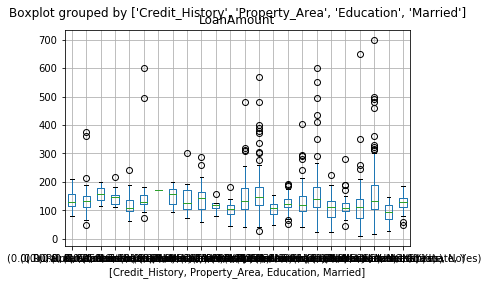

In [22]:
#plt.subplots(nrows=1, ncols=1, figsize=(12,7))
df.boxplot(column='LoanAmount', by = ['Credit_History','Property_Area','Education', 'Married'])

We can see the median throughout groups is different.  So, they can be used to impute the values.

The next pivot table generates the median values for all the groups.

In [7]:
table = df.pivot_table(values='LoanAmount', index='Credit_History',columns=['Property_Area','Education', 'Married'], aggfunc=np.median)
table


Property_Area     Rural                            Semiurban         \
Education      Graduate        Not Graduate         Graduate          
Married              No    Yes           No    Yes        No    Yes   
Credit_History                                                        
0.0               130.0  132.0        157.0  148.0     109.5  130.5   
1.0               133.5  147.5        109.0  122.5     118.0  138.0   

Property_Area                         Urban                             
Education      Not Graduate        Graduate        Not Graduate         
Married                  No    Yes       No    Yes           No    Yes  
Credit_History                                                          
0.0                   170.0  158.0    124.5  142.0        120.0  104.0  
1.0                   110.0  109.0    110.0  132.0         95.0  128.0

The next script provides us with a way to impute missing values of LoanAmount.

In [8]:
df2=df
df["LoanAmount"].fillna(df.groupby(['Credit_History','Property_Area','Education', 'Married'])['LoanAmount'].transform("median"), inplace=True)

#df["LoanAmount"].fillna(df.groupby(['Self_Employed','Education'])['LoanAmount'].transform("median"), inplace=True)
df.shape, df2.shape     

((981, 13), (981, 13))

In [9]:
# checking for missing values 
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## FEATURE ENGINEER

Here we proceed to recode, create new variables and reduce the effect of outlier observations.

## ApplicantIncome

ApplicantIncome and CoapplicantIncome are combined, generating the total revenue of the client. Here it is assumed that CoapplicantIncome is a real certified backup of the applicant.

In [10]:
# TotalIncome feature is made
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

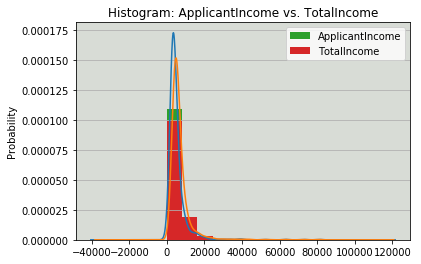

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

vars = ['ApplicantIncome','TotalIncome']
mydata = pd.DataFrame(df[vars])

fig, ax = plt.subplots()
mydata.plot.kde(ax=ax, legend=False, title='Histogram: ApplicantIncome vs. TotalIncome')
mydata.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

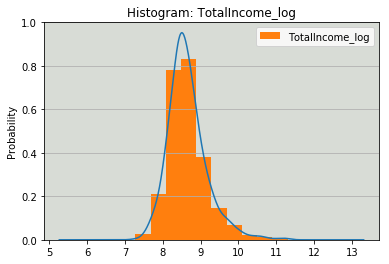

In [31]:
vars = ['TotalIncome_log']
mydata = pd.DataFrame(df[vars])

fig, ax = plt.subplots()
mydata.plot.kde(ax=ax, legend=False, title='Histogram: TotalIncome_log')
mydata.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

Now we see that the distribution is much better than before. So, "TotalIncome_log" will be considered instead of ApplicantIncome and CoapplicantIncome by itselves.

## LoanAmount

Extrema values (outliers) effect can be reduced by trying a log transformation.  This is a classical way to proceed one time we are in presence of a distribution shaped like this.

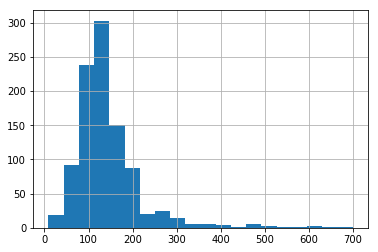

In [83]:
df['LoanAmount'].hist(bins=20)

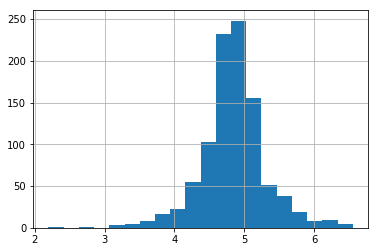

In [12]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. So, "LoanAmount_log" will be considered instead of LoanAmount by itself.

## New variable LoanIncome

Consider the new LoanIncome = "LoanAmount / TotalIncome" might make sense as it gives an idea of how well the applicant is suited to pay back his loan.

In [13]:
df['LoanIncome'] = df['LoanAmount'] / df['TotalIncome']
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log', 'LoanIncome'],
      dtype='object')


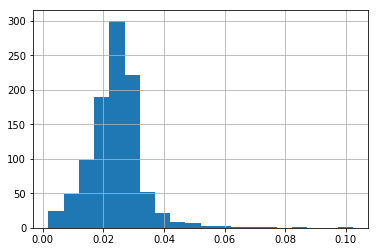

In [86]:
df['LoanIncome'].hist(bins=20)

LoanIncome has capture the individual shape of LoanAmount and TotalIncome. Then, let’s try a log transformation to nullify their outlier's effect.

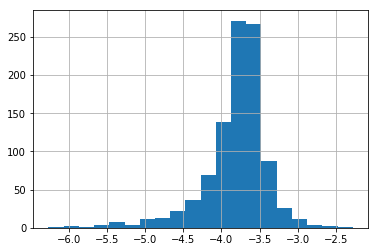

In [14]:
df['LoanIncome_log'] = np.log(df['LoanIncome'])
df['LoanIncome_log'].hist(bins=20)

Now we see that the distribution is much better than before. So, "LoanIncome_log" will be considered instead of LoanIncome by itself.

## About feature recoding

In [15]:
# checking for missing values 
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
LoanIncome           0
LoanIncome_log       0
dtype: int64

Sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

In [16]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
LoanIncome           float64
LoanIncome_log       float64
dtype: object

## About dummy variables

In [17]:
#keep a df backup
data = df

In [18]:
cat_vars=['Property_Area']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log', 'LoanIncome',
       'LoanIncome_log', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2'],
      dtype='object')

In [19]:
data.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
LoanIncome           float64
LoanIncome_log       float64
Property_Area_0        uint8
Property_Area_1        uint8
Property_Area_2        uint8
dtype: object

## EXPORTING FINAL DATASETS

## Full prepocessing dataset

In [18]:
cat_vars=['Property_Area_0', 'Property_Area_1', 'Property_Area_2']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=data[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Property_Area', 'Loan_Status', 'TotalIncome', 'TotalIncome_log',
        'LoanAmount_log', 'LoanIncome', 'LoanIncome_log'], dtype=object),
 Loan_ID               object
 Gender                 int64
 Married                int64
 Dependents             int64
 Education              int64
 Self_Employed          int64
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area          int64
 Loan_Status            int64
 TotalIncome          float64
 TotalIncome_log      float64
 LoanAmount_log       float64
 LoanIncome           float64
 LoanIncome_log       float64
 dtype: object,
 (981, 18))

In [20]:
data_final= pd.DataFrame(data_final)
data_final.to_csv("Loan_FullProcess.csv",index=None, sep=',')

## Full prepocessing logistic regression model dataset

In [62]:
cat_vars=['Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','LoanIncome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [63]:
data_final=data[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Loan_Amount_Term', 'Credit_History',
        'Loan_Status', 'TotalIncome_log', 'LoanAmount_log',
        'LoanIncome_log', 'Property_Area_0', 'Property_Area_1',
        'Property_Area_2'], dtype=object), Loan_ID              object
 Gender                int64
 Married               int64
 Dependents            int64
 Education             int64
 Self_Employed         int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       uint8
 Property_Area_1       uint8
 Property_Area_2       uint8
 dtype: object, (981, 15))

Now, we take a look at possible high Pearson correlation among the variables.

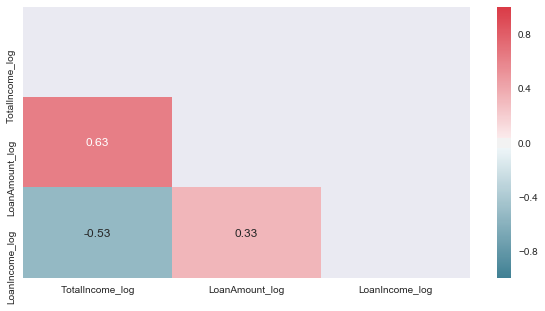

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

#corr = np.corrcoef(np.random.randn(10, 200))
vars = ['TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log']
df = data_final[vars]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(1, 1, figsize=(10, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr,  square=False, vmin=-1, vmax=1, center=0, annot=True, cmap=colormap, fmt=".2f", mask=mask)


There are not heavy signs of high Pearson's correlation between the variables.  So,  all of them are kept alive in the dataset.

In [23]:
data_final= pd.DataFrame(data_final)
data_final.to_csv("Loan_LRModel.csv",index=None, sep=',')

## Full dataset wihout missing values

### Reading original dataset

In [75]:
# read csv (comma separated value) into data
mydata=pd.read_csv('LoanFull.csv')
print(mydata.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Adding new variables

In [76]:
df=mydata
# TotalIncome and TotalIncome_log features are made
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [77]:
# LoanAmount_log feature is made
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [78]:
# LoanIncome and LoanIncome_log features are made
df['LoanIncome'] = df['LoanAmount'] / df['TotalIncome']
df['LoanIncome_log'] = np.log(df['LoanIncome'])

In [66]:
# looking at the file
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log', 'LoanIncome',
       'LoanIncome_log'],
      dtype='object')


### Getting ride of missing values

In [81]:
# dataset without missing values
df = mydata.dropna() # Get file without missing observations

In [82]:
# check missing values in dataset
print('Free shape is:​', mydata.shape) 
print('')
print('Free shape is: ', df.shape)

Free shape is:​ (981, 18)

Free shape is:  (769, 18)


### Recoding variables

In [83]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

C:\Users\Alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
LoanIncome           float64
LoanIncome_log       float64
dtype: object

### Dummy variables

In [84]:
#keep a df backup
data = df

In [85]:
cat_vars=['Property_Area']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log', 'LoanIncome',
       'LoanIncome_log', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2'],
      dtype='object')

In [86]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
LoanIncome           float64
LoanIncome_log       float64
Property_Area_0        uint8
Property_Area_1        uint8
Property_Area_2        uint8
dtype: object

### Exporting final dataset

In [87]:
cat_vars=['Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','LoanIncome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [88]:
data_final=data[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Loan_Amount_Term', 'Credit_History',
        'Loan_Status', 'TotalIncome_log', 'LoanAmount_log',
        'LoanIncome_log', 'Property_Area_0', 'Property_Area_1',
        'Property_Area_2'], dtype=object), Loan_ID              object
 Gender                int64
 Married               int64
 Dependents            int64
 Education             int64
 Self_Employed         int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       uint8
 Property_Area_1       uint8
 Property_Area_2       uint8
 dtype: object, (769, 15))

Now, we take a look at possible high Pearson correlation among the variables.

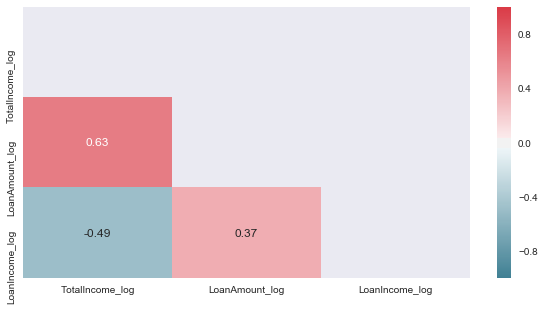

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

#corr = np.corrcoef(np.random.randn(10, 200))
vars = ['TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log']
df = data_final[vars]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(1, 1, figsize=(10, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr,  square=False, vmin=-1, vmax=1, center=0, annot=True, cmap=colormap, fmt=".2f", mask=mask)

In [ ]:
There are not heavy signs of high Pearson's correlation between the variables. So, all of them are kept alive in the dataset.

In [80]:
data_final= pd.DataFrame(data_final)
data_final.to_csv("LoanFree_LRModel.csv",index=None, sep=',')

<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>